<a href="https://colab.research.google.com/github/adbc09/Python-FALL2025/blob/main/Project_3_PYTHON_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Project 3
- NYPD Arrest Data Analysis
- Comparison betweem Manhattan and Brooklyn


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

- Loading the Database

In [9]:
from google.colab import files

uploaded = files.upload()

Saving NYPD_Arrest_Data_(Year_to_Date)_20260119.csv to NYPD_Arrest_Data_(Year_to_Date)_20260119 (1).csv


- Exploring The Data

In [13]:
import pandas as pd

file_name = list(uploaded.keys())[0]

df = pd.read_csv(file_name)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212486 entries, 0 to 212485
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ARREST_KEY         212486 non-null  int64  
 1   ARREST_DATE        212486 non-null  object 
 2   PD_CD              212486 non-null  int64  
 3   PD_DESC            212486 non-null  object 
 4   KY_CD              212470 non-null  float64
 5   OFNS_DESC          212486 non-null  object 
 6   LAW_CODE           212486 non-null  object 
 7   LAW_CAT_CD         211482 non-null  object 
 8   ARREST_BORO        212486 non-null  object 
 9   ARREST_PRECINCT    212486 non-null  int64  
 10  JURISDICTION_CODE  212486 non-null  int64  
 11  AGE_GROUP          212486 non-null  object 
 12  PERP_SEX           212486 non-null  object 
 13  PERP_RACE          212486 non-null  object 
 14  X_COORD_CD         212486 non-null  int64  
 15  Y_COORD_CD         212486 non-null  int64  
 16  La

In [14]:
df.describe()

,ARREST_KEY,PD_CD,KY_CD,ARREST_PRECINCT,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
count,2.124860e+05,212486.000000,212470.000000,212486.000000,212486.000000,2.124860e+05,212486.000000,212486.000000,212486.000000
mean,3.062481e+08,444.569901,258.236942,63.077426,0.908479,1.003371e+06,207112.864335,40.653639,-73.773658
std,4.357060e+06,273.845791,146.873614,34.890970,6.723647,4.999574e+04,31296.312460,1.834632,3.326835
min,2.987043e+08,12.000000,101.000000,1.000000,0.000000,-7.300000e+01,0.000000,0.000000,-74.252488
25%,3.022993e+08,157.000000,117.000000,40.000000,0.000000,9.903760e+05,184616.000000,40.673341,-73.977751
50%,3.063403e+08,439.000000,341.000000,62.000000,0.000000,1.005142e+06,206302.000000,40.732925,-73.924053
75%,3.099783e+08,724.000000,344.000000,100.000000,0.000000,1.017273e+06,236070.000000,40.814611,-73.880100
max,3.137501e+08,972.000000,995.000000,123.000000,97.000000,1.067220e+06,271597.000000,40.912111,0.000000


In [16]:
df.shape

(212486, 19)

In [18]:
df.dtypes

,0
ARREST_KEY,int64
ARREST_DATE,object
PD_CD,int64
PD_DESC,object
KY_CD,float64
OFNS_DESC,object
LAW_CODE,object
LAW_CAT_CD,object
ARREST_BORO,object
ARREST_PRECINCT,int64


In [20]:
df.head(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Location
0,298760433,01/02/2025,782,"WEAPONS, POSSESSION, ETC",236.0,DANGEROUS WEAPONS,PL 2650101,M,Q,115,3,(null),(null),BLACK,0,0,0.000000,0.000000,POINT (0 0)
1,299030225,01/07/2025,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,28,0,25-44,M,BLACK,997439,233857,40.808558,-73.952357,POINT (-73.952357 40.808558)
2,299127494,01/08/2025,849,"NY STATE LAWS,UNCLASSIFIED VIO",677.0,OTHER STATE LAWS,LOC00000V0,V,K,81,1,(null),(null),WHITE,0,0,0.000000,0.000000,POINT (0 0)
3,299188536,01/09/2025,259,"CRIMINAL MISCHIEF,UNCLASSIFIED 4",351.0,CRIMINAL MISCHIEF & RELATED OF,PL 1450001,M,M,7,2,(null),(null),BLACK,0,0,0.000000,0.000000,POINT (0 0)
4,299533742,01/16/2025,155,RAPE 2,104.0,RAPE,PL 1303001,F,K,81,0,18-24,F,BLACK,1005319,190473,40.689464,-73.924029,POINT (-73.9240290899499 40.6894642952604)
5,299633723,01/17/2025,922,"TRAFFIC,UNCLASSIFIED MISDEMEAN",348.0,VEHICLE AND TRAFFIC LAWS,VTL05110MU,M,Q,114,0,(null),(null),BLACK,0,0,0.000000,0.000000,POINT (0 0)
6,299782079,01/21/2025,105,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,M,10,0,25-44,M,BLACK,984685,209908,40.742835,-73.998429,POINT (-73.998429 40.742835)
7,299961366,01/24/2025,153,RAPE 3,104.0,RAPE,PL 1302507,F,S,120,0,18-24,M,WHITE,962873,174172,40.644721,-74.077033,POINT (-74.0770327198983 40.6447209438691)
8,299987678,01/24/2025,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,7,2,(null),(null),WHITE HISPANIC,0,0,0.000000,0.000000,POINT (0 0)
9,300507234,02/04/2025,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,115,3,(null),(null),BLACK,0,0,0.000000,0.000000,POINT (0 0)


In [21]:
df.tail(10)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Location
212476,313539990,09/27/2025,339,"LARCENY,PETIT FROM OPEN AREAS,",341.0,PETIT LARCENY,PL 1552500,M,M,14,17,45-64,M,WHITE,986780,212760,40.750664,-73.990868,POINT (-73.990868 40.750664)
212477,313663093,09/30/2025,101,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,Q,103,0,18-24,F,WHITE HISPANIC,1037868,195970,40.704417,-73.806617,POINT (-73.806617 40.704417)
212478,313582703,09/28/2025,115,RECKLESS ENDANGERMENT 2,355.0,OFFENSES AGAINST THE PERSON,PL 1202000,M,Q,104,0,25-44,M,BLACK HISPANIC,1011351,199457,40.714108,-73.902240,POINT (-73.90224 40.714108)
212479,313688931,09/30/2025,511,"CONTROLLED SUBSTANCE, POSSESSI",235.0,DANGEROUS DRUGS,PL 2200300,M,M,10,0,(null),(null),BLACK,983604,212598,40.750209,-74.002332,POINT (-74.00233152 40.75020888)
212480,313534093,09/27/2025,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,B,46,0,45-64,M,WHITE HISPANIC,1010817,251321,40.856463,-73.903961,POINT (-73.903961 40.856463)
212481,313721479,09/30/2025,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,M,14,0,25-44,M,BLACK,989384,210867,40.745465,-73.981470,POINT (-73.98147 40.745465)
212482,313591851,09/28/2025,117,RECKLESS ENDANGERMENT 1,126.0,MISCELLANEOUS PENAL LAW,PL 1202500,F,K,69,0,25-44,M,BLACK,1010576,175628,40.648706,-73.905129,POINT (-73.905129 40.648706)
212483,313631369,09/29/2025,109,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200502,F,B,47,0,25-44,F,BLACK HISPANIC,1024708,266922,40.899229,-73.853653,POINT (-73.853653 40.899229)
212484,313655670,09/29/2025,115,RECKLESS ENDANGERMENT 2,355.0,OFFENSES AGAINST THE PERSON,PL 1202000,M,Q,110,0,25-44,F,WHITE HISPANIC,1014130,211057,40.745939,-73.892164,POINT (-73.892164 40.745939)
212485,313589485,09/28/2025,661,"LEWDNESS,PUBLIC",361.0,OFF. AGNST PUB ORD SENSBLTY &,PL 24500BI,M,K,75,0,45-64,M,BLACK,1017119,183909,40.671413,-73.881510,POINT (-73.88151 40.671413)


-Cleaining the data.

In [27]:
# Removed rows that are missing borough or law category
clean_df = df.dropna(subset=["ARREST_BORO", "LAW_CAT_CD"])

-Choosing what to compare.

In [35]:
# Brooklyn = K, Manhattan = M
comparison_df = clean_df[
    (clean_df["ARREST_BORO"] == "K") |
    (clean_df["ARREST_BORO"] == "M")
]

-Choosing a feature.

In [30]:
# Felony (F), Misdemeanor (M), Violation (V)
summary = comparison_df.groupby(
    ["ARREST_BORO", "LAW_CAT_CD"]
).size()

-Turning results in a table.

In [31]:
summary_table = summary.unstack(fill_value=0)

print("\nArrest Counts by Law Category:")
print(summary_table)


Arrest Counts by Law Category:
LAW_CAT_CD    9      F   I      M     V
ARREST_BORO                            
K            79  24708  51  33593  1579
M            94  19285  40  30293   622


-Creating Visualizations.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '9'),
  Text(1, 0, 'F'),
  Text(2, 0, 'I'),
  Text(3, 0, 'M'),
  Text(4, 0, 'V')])

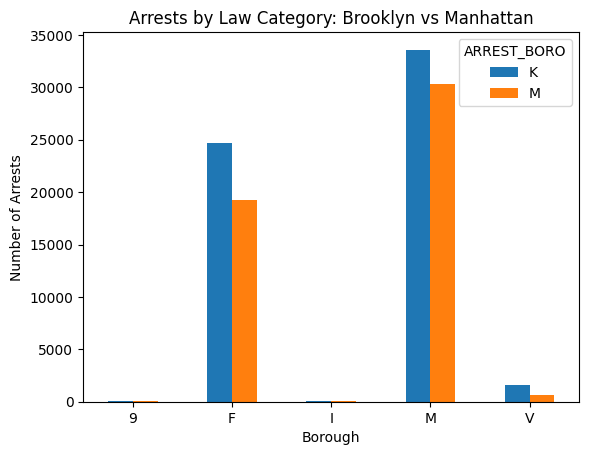

In [26]:
summary_table = comparison_df.groupby(['ARREST_BORO', 'LAW_CAT_CD']).size().unstack(level='ARREST_BORO')
summary_table.plot(kind="bar")

plt.title("Arrests by Law Category: Brooklyn vs Manhattan")
plt.xlabel("Borough")
plt.ylabel("Number of Arrests")
plt.xticks(rotation=0)

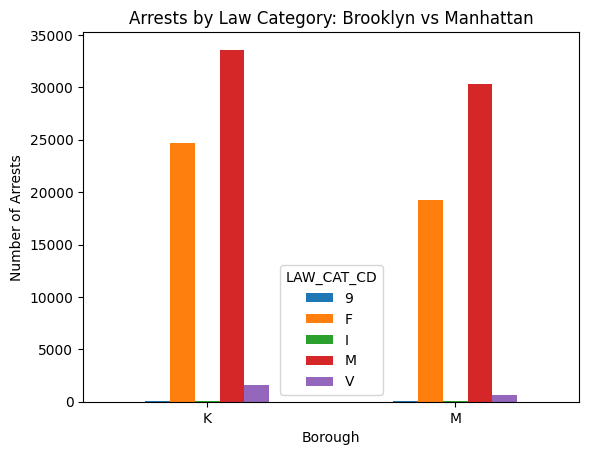

In [36]:
summary_table.plot(kind="bar")

plt.title("Arrests by Law Category: Brooklyn vs Manhattan")
plt.xlabel("Borough")
plt.ylabel("Number of Arrests")
plt.xticks(rotation=0)

plt.show()

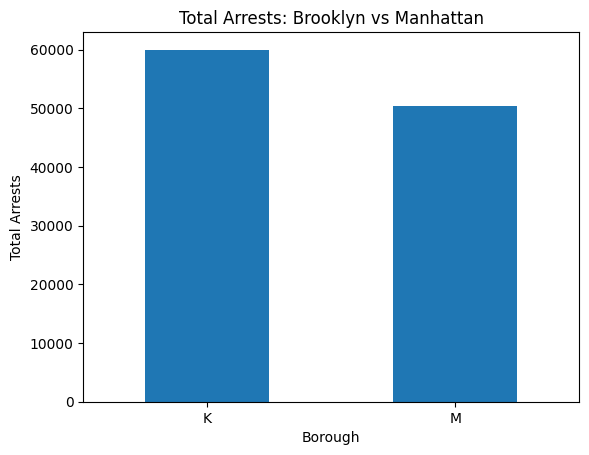

In [37]:
total_arrests = comparison_df.groupby("ARREST_BORO").size()

total_arrests.plot(kind="bar")

plt.title("Total Arrests: Brooklyn vs Manhattan")
plt.xlabel("Borough")
plt.ylabel("Total Arrests")
plt.xticks(rotation=0)

plt.show()

-Conlusion.

- Brooklyn has higher arrest counts across all categories.
- Arrest data reflects policing practices and enforcement patterns, which may introduce systemic bias.